In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [3]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [15]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [5]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [7]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


In [8]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [33]:
!pip install graphviz==0.9
!pip install pydot
!apt-get install graphviz
!pip install seaborn==0.9.0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


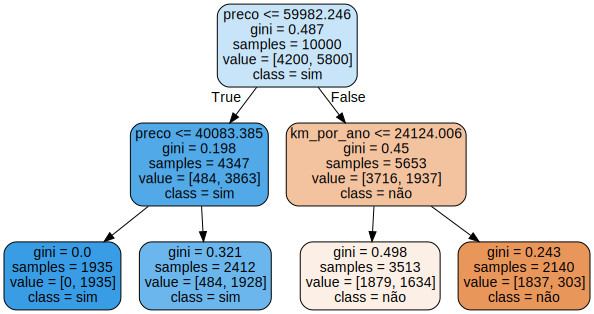

In [16]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [75.87, 81.53]


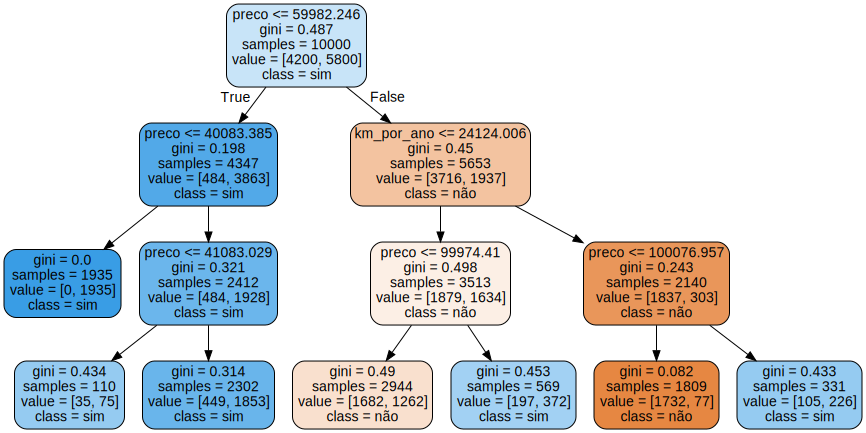

In [14]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [28]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  #print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))
  print("Arvore max_depth = %d, teste = %.2f, treino = %.2f" % (max_depth,test_score, train_score))
  tabela = [max_depth, train_score, test_score]
  return tabela


resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "teste", "treino"])

Arvore max_depth = 1, teste = 75.78, treino = 75.79
Arvore max_depth = 2, teste = 75.78, treino = 75.79
Arvore max_depth = 3, teste = 78.70, treino = 78.75
Arvore max_depth = 4, teste = 78.63, treino = 78.80
Arvore max_depth = 5, teste = 78.56, treino = 78.97
Arvore max_depth = 6, teste = 78.49, treino = 79.19
Arvore max_depth = 7, teste = 78.04, treino = 79.44
Arvore max_depth = 8, teste = 77.83, treino = 79.81
Arvore max_depth = 9, teste = 77.55, treino = 80.36
Arvore max_depth = 10, teste = 77.03, treino = 80.99
Arvore max_depth = 11, teste = 76.30, treino = 81.79
Arvore max_depth = 12, teste = 76.15, treino = 82.64
Arvore max_depth = 13, teste = 75.71, treino = 83.56
Arvore max_depth = 14, teste = 75.40, treino = 84.56
Arvore max_depth = 15, teste = 75.32, treino = 85.62
Arvore max_depth = 16, teste = 75.09, treino = 86.75
Arvore max_depth = 17, teste = 74.92, treino = 87.80
Arvore max_depth = 18, teste = 74.82, treino = 88.81
Arvore max_depth = 19, teste = 74.04, treino = 89.85
Ar

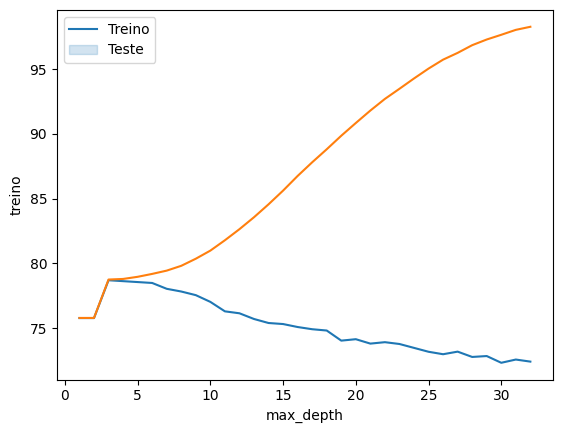

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "treino",data = resultados)
sns.lineplot(x = "max_depth", y = "teste",data = resultados)
plt.legend(["Treino", "Teste"])

In [40]:
resultados.sort_values("treino", ascending=False).head()

,max_depth,teste,treino
2,3,78.754444,78.70
3,4,78.800000,78.63
4,5,78.965556,78.56
5,6,79.190000,78.49
6,7,79.443333,78.04


In [44]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  #print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))
  print("Arvore max_depth = %d, min_samples_leaf = %d,teste = %.2f, treino = %.2f" % (max_depth, min_samples_leaf,test_score, train_score))
  tabela = [max_depth, min_samples_leaf,train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf","teste", "treino"])
  return resultados
resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32,teste = 75.78, treino = 75.79
Arvore max_depth = 1, min_samples_leaf = 64,teste = 75.78, treino = 75.79
Arvore max_depth = 1, min_samples_leaf = 128,teste = 75.78, treino = 75.79
Arvore max_depth = 1, min_samples_leaf = 256,teste = 75.78, treino = 75.79
Arvore max_depth = 2, min_samples_leaf = 32,teste = 75.78, treino = 75.79
Arvore max_depth = 2, min_samples_leaf = 64,teste = 75.78, treino = 75.79
Arvore max_depth = 2, min_samples_leaf = 128,teste = 75.78, treino = 75.79
Arvore max_depth = 2, min_samples_leaf = 256,teste = 75.78, treino = 75.79
Arvore max_depth = 3, min_samples_leaf = 32,teste = 78.70, treino = 78.75
Arvore max_depth = 3, min_samples_leaf = 64,teste = 78.70, treino = 78.75
Arvore max_depth = 3, min_samples_leaf = 128,teste = 78.70, treino = 78.75
Arvore max_depth = 3, min_samples_leaf = 256,teste = 78.70, treino = 78.75
Arvore max_depth = 4, min_samples_leaf = 32,teste = 78.65, treino = 78.76
Arvore max_depth = 4, min_sample

,max_depth,min_samples_leaf,teste,treino
0,1,32,75.791111,75.78
1,1,64,75.791111,75.78
2,1,128,75.791111,75.78
3,1,256,75.791111,75.78
4,2,32,75.791111,75.78


In [45]:
resultados.sort_values("teste", ascending=False).head()

,max_depth,min_samples_leaf,teste,treino
96,25,32,80.843333,76.81
120,31,32,80.843333,76.81
88,23,32,80.843333,76.81
100,26,32,80.843333,76.81
112,29,32,80.843333,76.81


In [48]:
corr = resultados.corr()

<Axes: >

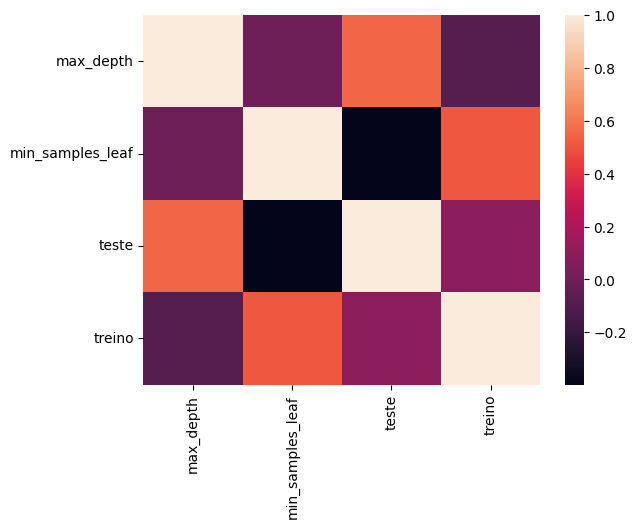

In [49]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='teste', ylabel='max_depth'>,
        <Axes: xlabel='treino', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='teste', ylabel='min_samples_leaf'>,
        <Axes: xlabel='treino', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='teste'>,
        <Axes: xlabel='min_samples_leaf', ylabel='teste'>,
        <Axes: xlabel='teste', ylabel='teste'>,
        <Axes: xlabel='treino', ylabel='teste'>],
       [<Axes: xlabel='max_depth', ylabel='treino'>,
        <Axes: xlabel='min_samples_leaf', ylabel='treino'>,
        <Axes: xlabel='teste', ylabel='treino'>,
        <Axes: xlabel='treino', ylabel='treino'>]], dtype=object)

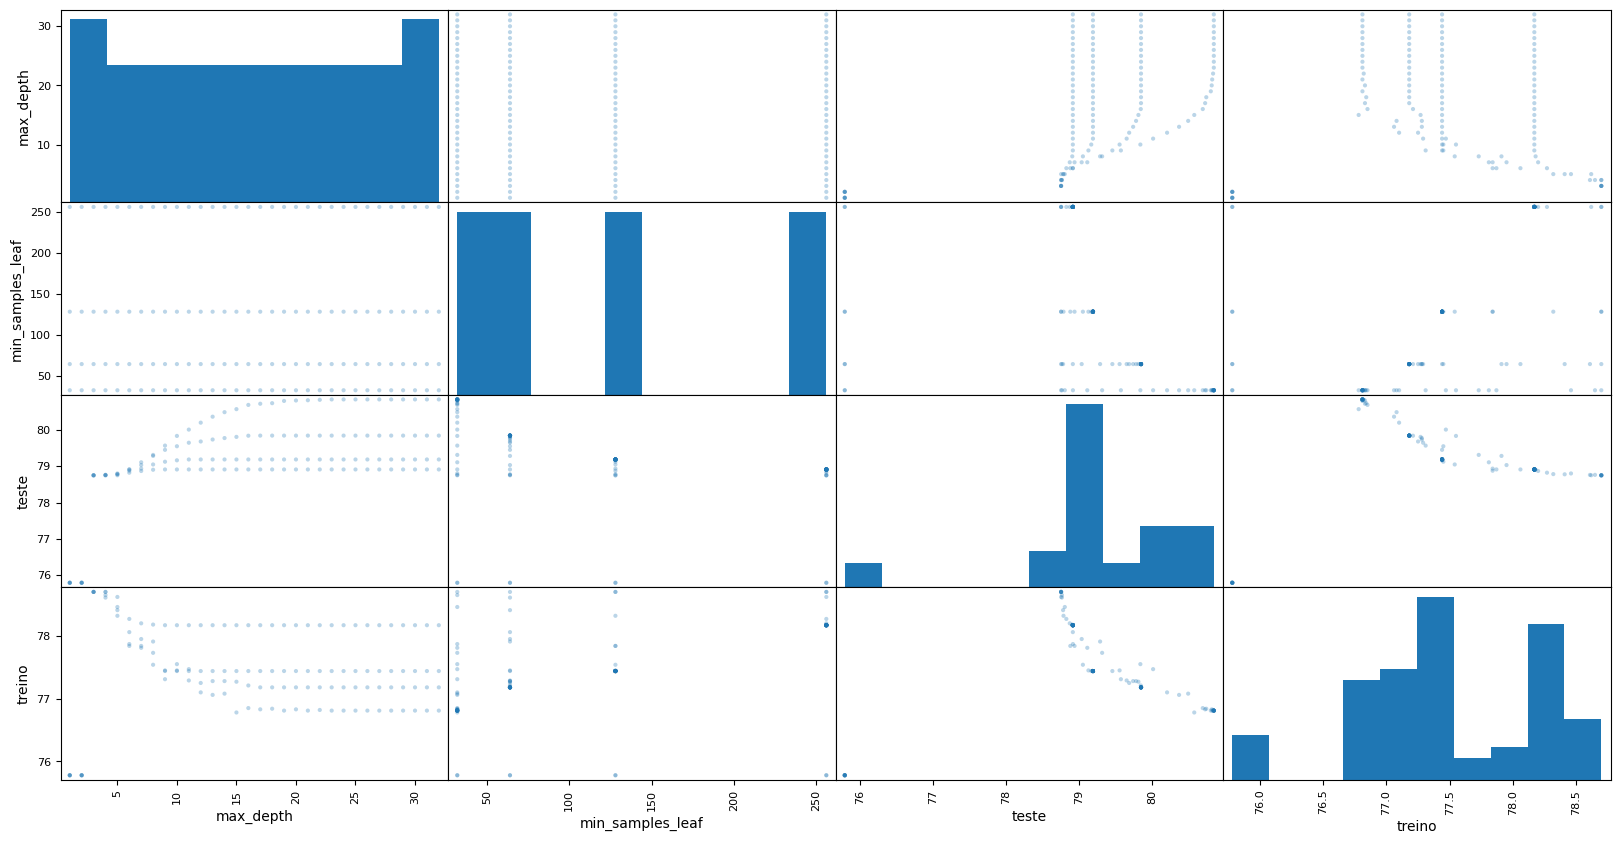

In [56]:
pd.plotting.scatter_matrix(resultados, figsize=(20,10), alpha = 0.3)

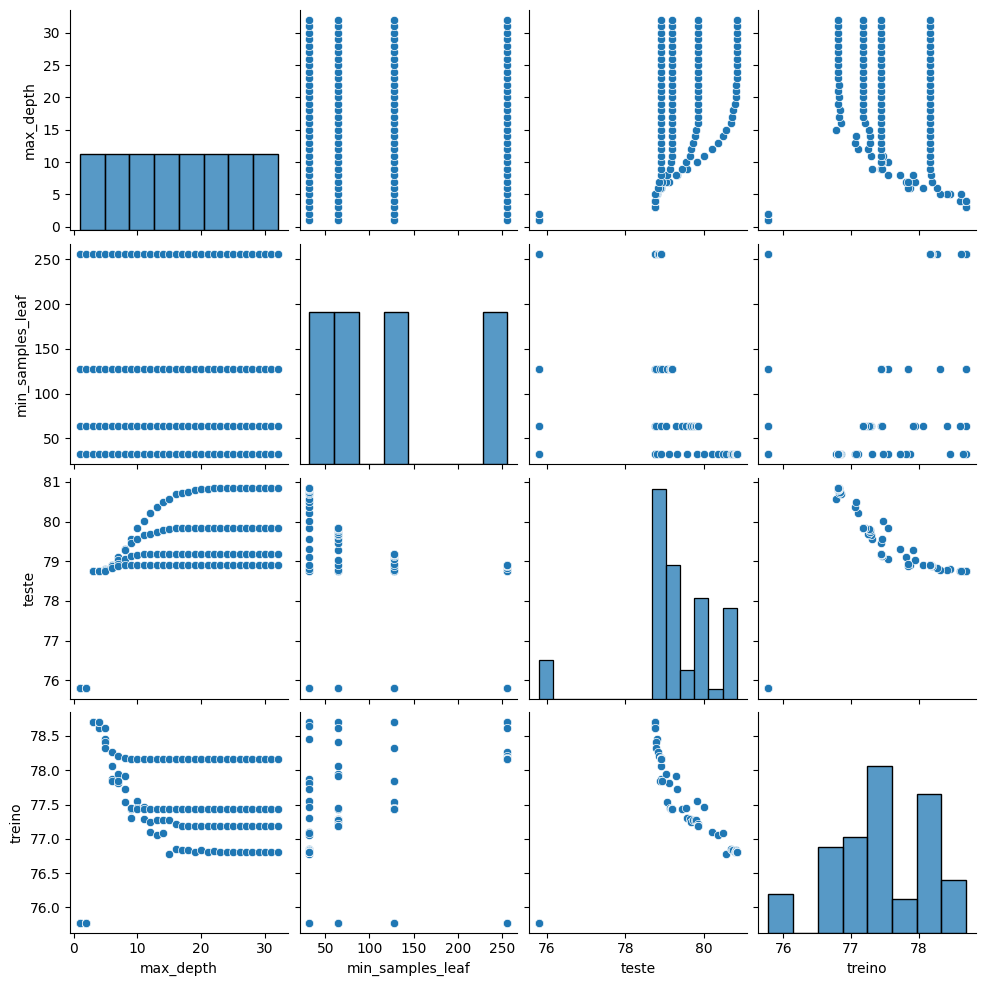

In [57]:
sns.pairplot(resultados)

<Axes: >

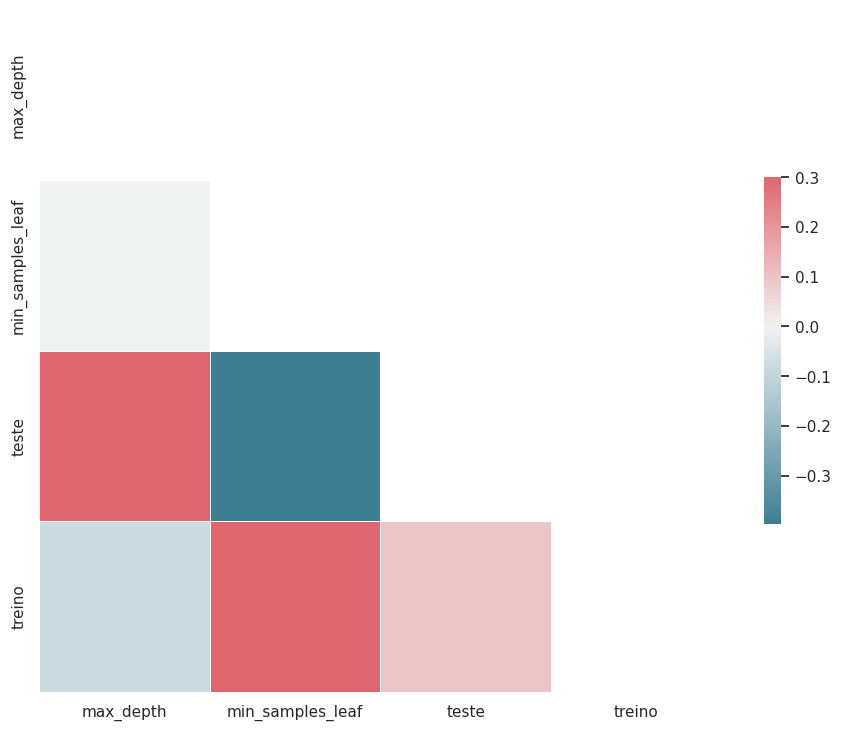

In [61]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf","teste", "treino"])
  return resultados
resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128,teste = 75.78, treino = 75.79
Arvore max_depth = 1, min_samples_leaf = 192,teste = 75.78, treino = 75.79
Arvore max_depth = 1, min_samples_leaf = 256,teste = 75.78, treino = 75.79
Arvore max_depth = 1, min_samples_leaf = 512,teste = 75.78, treino = 75.79
Arvore max_depth = 2, min_samples_leaf = 128,teste = 75.78, treino = 75.79
Arvore max_depth = 2, min_samples_leaf = 192,teste = 75.78, treino = 75.79
Arvore max_depth = 2, min_samples_leaf = 256,teste = 75.78, treino = 75.79
Arvore max_depth = 2, min_samples_leaf = 512,teste = 75.78, treino = 75.79
Arvore max_depth = 3, min_samples_leaf = 128,teste = 78.70, treino = 78.75
Arvore max_depth = 3, min_samples_leaf = 192,teste = 78.70, treino = 78.75
Arvore max_depth = 3, min_samples_leaf = 256,teste = 78.70, treino = 78.75
Arvore max_depth = 3, min_samples_leaf = 512,teste = 77.47, treino = 77.53
Arvore max_depth = 4, min_samples_leaf = 128,teste = 78.70, treino = 78.75
Arvore max_depth = 4, min

,max_depth,min_samples_leaf,teste,treino
0,1,128,75.791111,75.78
1,1,192,75.791111,75.78
2,1,256,75.791111,75.78
3,1,512,75.791111,75.78
4,2,128,75.791111,75.78


<Axes: >

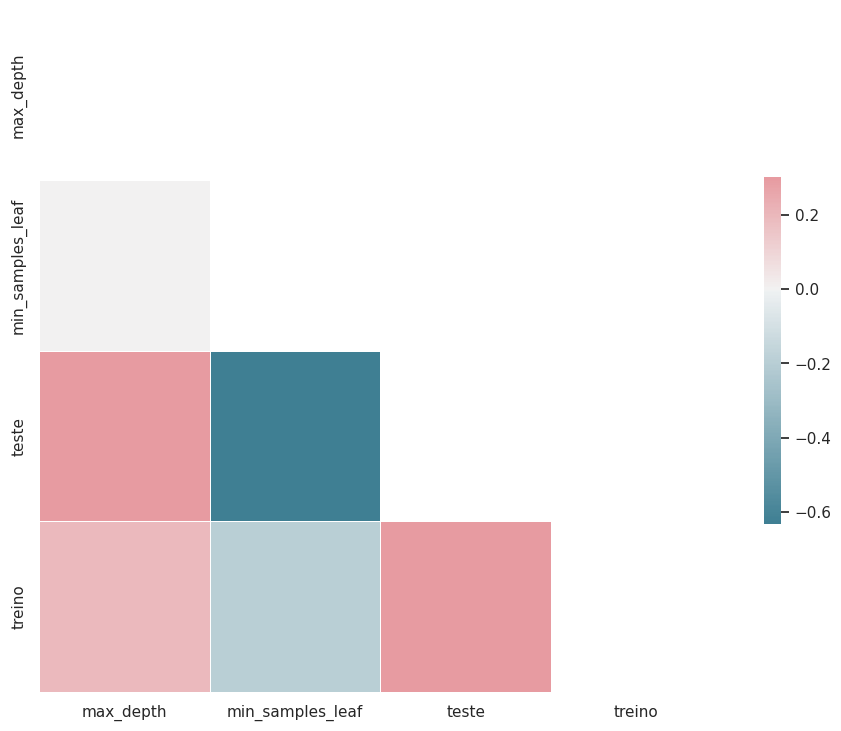

In [63]:
corr = resultados.corr()
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
resultados.sort_values("teste", ascending=False).head()

,max_depth,min_samples_leaf,teste,treino
64,17,128,79.188889,77.44
116,30,128,79.188889,77.44
112,29,128,79.188889,77.44
44,12,128,79.188889,77.44
52,14,128,79.188889,77.44


In [70]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  #print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))
  #print("Arvore max_depth = %d, min_samples_leaf = %d, min_samples_split = %d,teste = %.2f, treino = %.2f" % (max_depth, min_samples_leaf, min_samples_split,test_score, train_score))
  tabela = [max_depth, min_samples_leaf, min_samples_split,train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf", "min_samples_split","teste", "treino", "fit_time", "score_time"])
  return resultados
resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,teste,treino,fit_time,score_time
0,1,32,32,75.791111,75.78,0.011280,0.006060
1,1,32,64,75.791111,75.78,0.013158,0.005428
2,1,32,128,75.791111,75.78,0.010235,0.004292
3,1,32,256,75.791111,75.78,0.010424,0.004121
4,1,64,32,75.791111,75.78,0.011286,0.004255


<Axes: >

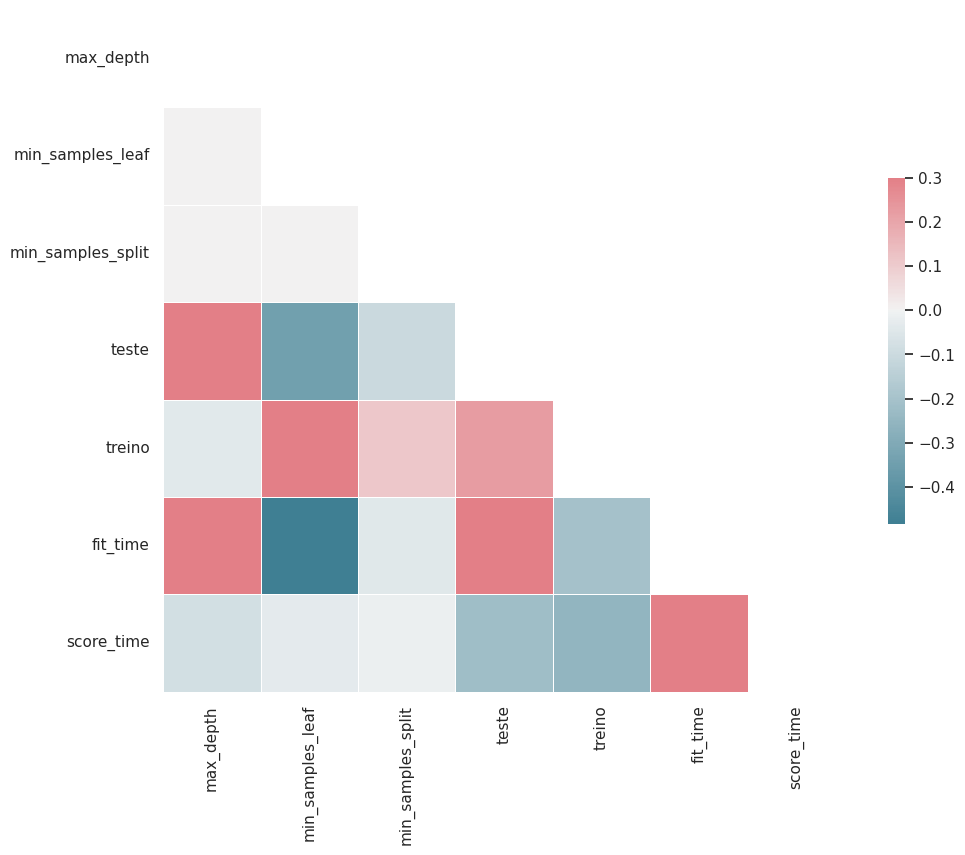

In [71]:
corr = resultados.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [72]:
resultados.sort_values("teste", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,teste,treino,fit_time,score_time
352,23,32,32,80.843333,76.81,0.027211,0.003100
496,32,32,32,80.843333,76.81,0.027977,0.003139
465,30,32,64,80.843333,76.81,0.028094,0.002844
464,30,32,32,80.843333,76.81,0.027570,0.002904
449,29,32,64,80.843333,76.81,0.038153,0.004442


In [73]:
from sklearn.model_selection import GridSearchCV
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011877,0.000801,0.002774,0.000205,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.015213,0.003707,0.003926,0.000964,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.021373,0.007008,0.006033,0.003164,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.017064,0.000845,0.004212,0.000399,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.018974,0.005467,0.005415,0.002221,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [74]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [75]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [79]:
from sklearn.metrics import accuracy_score

#Evitar essa abordagem pois é otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print(f"Accuracy para os dados foi {accuracy}%")

Accuracy para os dados foi 78.75%


In [80]:
#Nested cross validate
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)

#Infelizmente o Pandas ainda está com o bug e não suporta nested validation com group k fold. Logo não conseguimos prever o resultado para novos grupos

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 833, in evaluate_candidates
    for (cand_idx, parameters), (split_idx, (train, test)) in product(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py", line 352, in split
    for train, test in super().split(X, y, groups):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py", line 85, in split
    for test_index in self._iter_test_masks(X, y, groups):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py", line 97, in _iter_test_masks
    for test_index in self._iter_test_indices(X, y, groups):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py", line 530, in _iter_test_indices
    raise ValueError("The 'groups' parameter should not be None.")
ValueError: The 'groups' parameter should not be None.


In [84]:
from sklearn.model_selection import GridSearchCV, KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018583,0.004384,0.005034,0.000143,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.017451,0.001805,0.006100,0.001627,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.015862,0.000485,0.005307,0.001191,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.016363,0.000846,0.005691,0.001230,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.015775,0.000278,0.006007,0.002353,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [85]:
#Nested cross validate
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=10, shuffle = True), groups = dados.modelo)
scores

array([0.805, 0.774, 0.781, 0.784, 0.789, 0.794, 0.785, 0.756, 0.811,
       0.788])

In [86]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [87]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [75.75, 81.59]


In [88]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


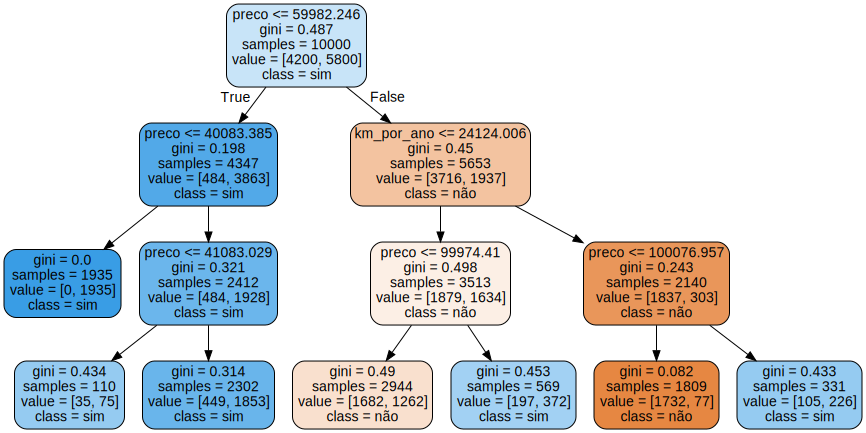

In [89]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names = features)

graph = graphviz.Source(dot_data)
graph